In [1]:
import numpy as np

patterns = []
classes = []

filename = 'Iris_data.txt'

file = open(filename,'r')

for line in file.readlines():
    row = line.strip().split(',')
    patterns.append(row[0:4])
    classes.append(row[4])
print "Iris Data Loaded"
file.close

patterns = np.asarray(patterns,dtype=np.float32)

sample_no = np.random.randint(0,len(patterns))

print "Sample pattern: "+str(patterns[int(sample_no)])
print "Class of the above pattern: "+str(classes[int(sample_no)])
    

Iris Data Loaded
Sample pattern: [ 6.4000001   2.70000005  5.30000019  1.89999998]
Class of the above pattern: Iris-virginica


In [2]:
input_dimensions = 4

map_width = 10
map_height = 5
MAP = np.random.uniform(size=(map_height,map_width,input_dimensions))
#print MAP

radius0 = max(map_width,map_height)/2
learning_rate0 = 0.1

coordinate_map = np.zeros([map_height,map_width,2],dtype=np.int32)

for i in xrange(0,map_height):
    for j in xrange(0,map_width):
        coordinate_map[i][j] = [i,j]

In [3]:
import math
import random

def Eucli_dists(MAP,x):
    x = x.reshape((1,1,-1))
    Eucli_MAP = MAP - x
    Eucli_MAP = Eucli_MAP**2
    Eucli_MAP = np.sqrt(np.sum(Eucli_MAP,2))
    return Eucli_MAP

epochs = 500
radius=radius0
learning_rate = learning_rate0
timestep = 0
max_iterations = epochs*len(patterns)
BMU = np.zeros([2],dtype=np.int32)

t=0
for epoch in xrange(0,epochs):
    
    shuffle = random.sample(np.arange(0,len(patterns),1,'int'),len(patterns))
    
    for i in xrange(0,len(patterns)):
        
        pattern = patterns[shuffle[i]]
        Eucli_MAP = Eucli_dists(MAP,pattern)
        
        BMU[0] = np.argmin(np.amin(Eucli_MAP,1),0)
        BMU[1] = np.argmin(Eucli_MAP,1)[int(BMU[0])]
    
        Eucli_from_BMU = Eucli_dists(coordinate_map,BMU)  
    
        for i in xrange(0,map_height):
            for j in xrange(0,map_width):
            
                distance = Eucli_from_BMU[i][j]
            
                if distance <= radius: 
                    theta = math.exp(-(distance**2)/(2*(radius**2)))
                    MAP[i][j] = MAP[i][j] + theta*learning_rate*(pattern-MAP[i][j])
                
        learning_rate = learning_rate0*math.exp(-(t+1)/max_iterations)
        time_constant = max_iterations/math.log(radius) 
        radius = radius0*math.exp(-(t+1)/time_constant)
        t+=1
    


Red = Iris-Setosa
Green = Iris-Virginica
Blue = Iris-Versicolor



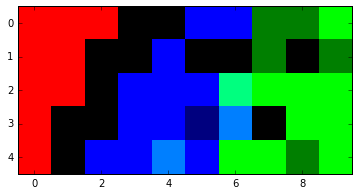

In [4]:
import matplotlib.pyplot as plt
from scipy.misc import toimage
%matplotlib inline

BMU = np.zeros([2],dtype=np.int32)
result_map = np.zeros([map_height,map_width,3],dtype=np.float32)

i=0
for pattern in patterns:
    
    Eucli_MAP = Eucli_dists(MAP,pattern)
    
    BMU[0] = np.argmin(np.amin(Eucli_MAP,1),0)
    BMU[1] = np.argmin(Eucli_MAP,1)[int(BMU[0])]
    
    x = BMU[0]
    y = BMU[1]
    
    if classes[i] == 'Iris-setosa':
        if result_map[x][y][0] <= 0.5:
            result_map[x][y] += np.asarray([0.5,0,0])
    elif classes[i] == 'Iris-virginica':
        if result_map[x][y][1] <= 0.5:
            result_map[x][y] += np.asarray([0,0.5,0])
    elif classes[i] == 'Iris-versicolor':
        if result_map[x][y][2] <= 0.5:
            result_map[x][y] += np.asarray([0,0,0.5])
    i+=1
result_map = np.flip(result_map,0)
    
#print result_map

print "\nRed = Iris-Setosa"
print "Green = Iris-Virginica"
print "Blue = Iris-Versicolor\n"

plt.imshow(toimage(result_map),interpolation='nearest')